# Data Retrieval

In [1]:
import pandas as pd

df2 = pd.read_csv('Downloads/spotify_covid_all_podcasts.csv', 
index_col=False, header=0)
df2.head()

,Unnamed: 0,show_id,show_name,show_description,show_publisher,show_language,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,ep_language
0,0,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,['en'],4CJ0YYEbGb9Ddob8ZaXi0K,986305.0,2020-06-17,Meet the COVID-19 Consumer,Consumer spending is one of the most important...,https://p.scdn.co/mp3-preview/469f82d76572acde...,NaN
1,1,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,['en'],2BK0m7saf2L8otmjfIaL59,1169868.0,2020-06-10,Could the Fed’s Rescue Go Awry?,"Central banks are playing a critical, yet litt...",https://p.scdn.co/mp3-preview/3d4adc200458d2ba...,NaN
2,2,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,['en'],22QsjScr86tSpH42SpweCs,1437048.0,2020-06-09,Rethinking the Jobless Benefits Boost,"Under the CARES Act, two-thirds of eligible un...",https://p.scdn.co/mp3-preview/ad0c25a0eafa03bb...,NaN
3,3,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,['en'],6LDoFkjjIPiAFN8WYXTVHI,1133087.0,2020-05-28,Learning from South Korea's Success,South Korea detected its first case of COVID-1...,https://p.scdn.co/mp3-preview/7877362b5ff066ad...,NaN
4,4,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,['en'],0iYjt1qkAAtlxJmUtDn71z,1348127.0,2020-05-21,Superspreaders,Does visiting a bookstore put you at greater r...,https://p.scdn.co/mp3-preview/e8e3732ee9088264...,NaN


# Data Cleansing

In [2]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

# remove punctuation, short words, whitespaces, numeric
filters = [
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.strip_short
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [3]:
df2_clean = pd.DataFrame()

In [4]:
df2_clean['notes'] = df2['ep_description'].astype(str).map(lambda x: clean_text(x))

In [5]:
df2_clean['date'] = df2['ep_release_date']
df2_clean.head()

,notes,date
0,consumer spending one the most important indic...,2020-06-17
1,central banks are playing critical yet little ...,2020-06-10
2,under the cares act two thirds eligible unempl...,2020-06-09
3,south korea detected its first case covid one ...,2020-05-28
4,does visiting bookstore put you greater risk f...,2020-05-21


In [126]:
df_words = pd.DataFrame()
df_words = df2_clean.set_index(['date', 'notes_clean']).apply(lambda x: x.str.split(' ').explode()).reset_index()
df_words

,date,notes_clean,notes
0,2020-06-17,consumer spending one important indicators eco...,consumer
1,2020-06-17,consumer spending one important indicators eco...,spending
2,2020-06-17,consumer spending one important indicators eco...,one
3,2020-06-17,consumer spending one important indicators eco...,the
4,2020-06-17,consumer spending one important indicators eco...,most
...,...,...,...
1716946,2020-06-09,manage physical mental spiritual wellbeing dea...,dealing
1716947,2020-06-09,manage physical mental spiritual wellbeing dea...,with
1716948,2020-06-09,manage physical mental spiritual wellbeing dea...,chaos
1716949,2020-06-09,manage physical mental spiritual wellbeing dea...,and


In [127]:
df_words.to_csv('Downloads/spotify_covid_episodes_words.csv')

## Remove Stopwords

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords_en = set(STOPWORDS)
print(stopwords_en)

{'only', "didn't", 'has', 'as', 'how', 'while', "they'd", 'such', 'the', 'her', "couldn't", 'my', 'because', 'whom', 'why', 'below', 'themselves', 'she', 'each', 'until', "here's", "that's", 'by', "we've", 'at', 'during', 'itself', 'cannot', 'ought', "where's", 'him', 'no', "he'll", 'more', 'not', 'were', 'own', 'an', 'before', 'few', 'for', 'some', 'yourselves', 'me', 'they', "hasn't", 'else', "i'm", "hadn't", 'com', "won't", "shan't", 'can', 'through', 'would', 'but', 'should', "she'll", 'having', "let's", 'are', 'herself', "i'll", 'over', "you'll", 'between', 'shall', 'then', 'other', 'did', 'most', 'under', 'any', "shouldn't", "weren't", 'that', 'yourself', 'nor', 'it', 'our', 'have', "we're", 'himself', 'further', "they've", 'is', 'and', "they're", 'up', 'however', 'them', 'or', "you're", "he's", 'had', 'http', 'hence', 'am', 'too', 'was', 'about', "she'd", 'since', 'what', 'those', "mustn't", 'to', 'very', 'same', 'again', "we'll", "haven't", 'in', 'otherwise', "can't", 'i', 'its

In [7]:
generic_words = ['https','com','podcast','episode']

In [8]:
exclusions = []
exclusions.extend(generic_words)
exclusions.extend(stopwords_en)

print(exclusions)

['https', 'com', 'podcast', 'episode', 'only', "didn't", 'has', 'as', 'how', 'while', "they'd", 'such', 'the', 'her', "couldn't", 'my', 'because', 'whom', 'why', 'below', 'themselves', 'she', 'each', 'until', "here's", "that's", 'by', "we've", 'at', 'during', 'itself', 'cannot', 'ought', "where's", 'him', 'no', "he'll", 'more', 'not', 'were', 'own', 'an', 'before', 'few', 'for', 'some', 'yourselves', 'me', 'they', "hasn't", 'else', "i'm", "hadn't", 'com', "won't", "shan't", 'can', 'through', 'would', 'but', 'should', "she'll", 'having', "let's", 'are', 'herself', "i'll", 'over', "you'll", 'between', 'shall', 'then', 'other', 'did', 'most', 'under', 'any', "shouldn't", "weren't", 'that', 'yourself', 'nor', 'it', 'our', 'have', "we're", 'himself', 'further', "they've", 'is', 'and', "they're", 'up', 'however', 'them', 'or', "you're", "he's", 'had', 'http', 'hence', 'am', 'too', 'was', 'about', "she'd", 'since', 'what', 'those', "mustn't", 'to', 'very', 'same', 'again', "we'll", "haven't",

In [9]:
df2_clean['notes_clean'] = df2_clean['notes'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))

In [10]:
df2_clean['notes_clean'].head()

0    consumer spending one important indicators eco...
1    central banks playing critical yet little disc...
2    cares act two thirds eligible unemployed ameri...
3    south korea detected first case covid one day ...
4    visiting bookstore put greater risk infection ...
Name: notes_clean, dtype: object

# Exploration : Most Common Words

In [81]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in df2_clean.iterrows():
    c = Counter(row['notes_clean'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

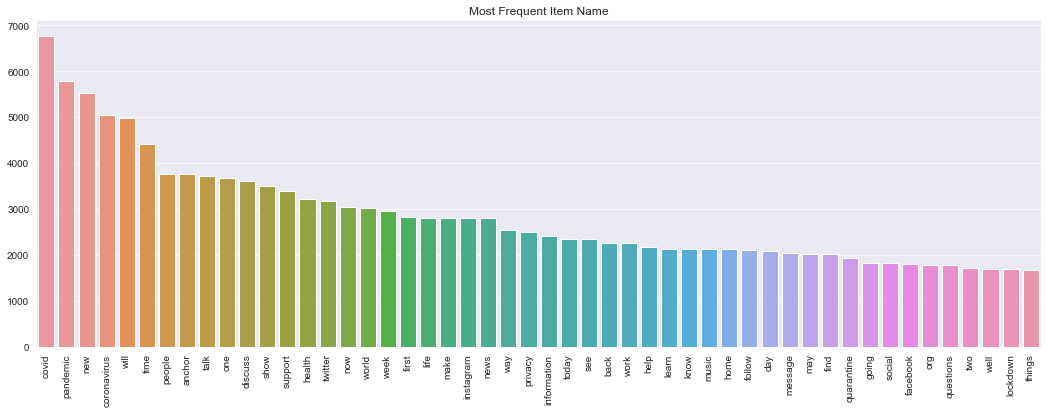

In [83]:
barplot(words=common_words, words_counts=common_words_counts, title='Most Frequent Item Name')

# Overall Wordcloud

In [84]:
wordbank = df2_clean['notes_clean'].unique()

wordbank

array(['consumer spending one important indicators economic health michael weber constantine yannelis share research insights effect pandemic federal stimulus policies spending trends tell economic recovery',
       'central banks playing critical yet little discussed role limiting economic damage covid chicago booth professor former governor reserve bank india raghuram rajan discusses pandemic forcing federal reserve international counterparts uncharted territory',
       'cares act two thirds eligible unemployed americans access unemployment insurance exceeding prior earnings peter ganong joseph vavra discuss fact means unemployed economic recovery covid improve program future federal relief packages',
       ...,
       'made partners keith bradley thomas mcintyre tyler enders brief coronavirus pandemic update',
       'coronavirus spreads respiratory droplets released someone virus coughs sneezes talks dentists exercising precaution two dentists join talk clinics continue provide d

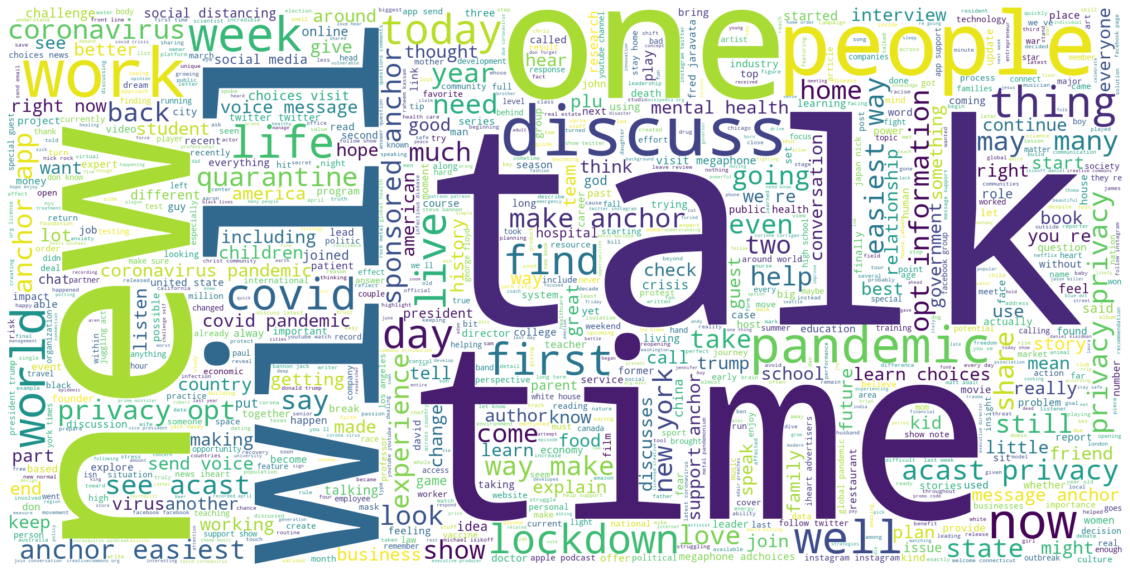

In [85]:
# build a word cloud

wordcloud = WordCloud(background_color='white', stopwords=stopwords_en, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Embedding

In [86]:
import multiprocessing

from gensim.models import Word2Vec

In [87]:
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [88]:
from gensim.models.phrases import Phrases, Phraser

sent = [row.split() for row in df2_clean['notes_clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)

bigram = Phraser(phrases)

sentences = bigram[sent]

In [89]:
from time import time

t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.06 mins


In [90]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 1.66 mins


In [91]:
w2v_model.init_sims(replace=True)

# Visualizations : T-SNE

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [109]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [107]:
tsnescatterplot(w2v_model, "pandemic", [t[0] for t in w2v_model.wv.most_similar(positive=["pandemic"], topn=20)][10:])

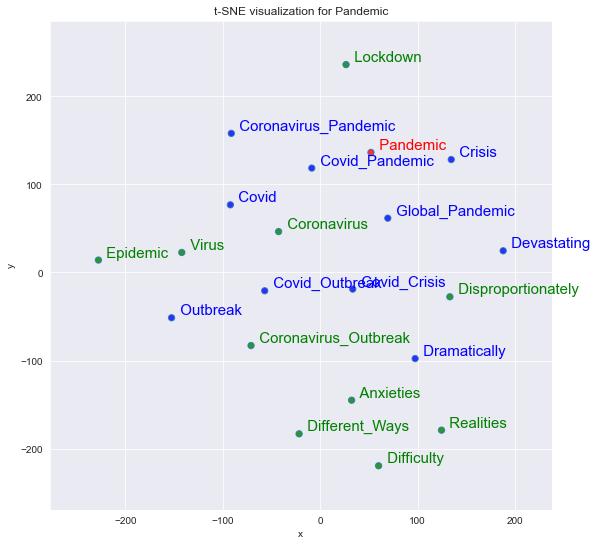

In [108]:
plt.show()

# Clustering Topics

In [95]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

In [96]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [97]:
Z = w2v_model.wv.syn0;

centers, clusters = clustering_on_wordvecs(Z, 15);
centroid_map = dict(zip(w2v_model.wv.index2word, clusters));

<ipython-input-97-b54c13598775>:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  Z = w2v_model.wv.syn0;


In [110]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [111]:
top_words = get_top_words(w2v_model.wv.index2word, 15, centers, Z);

In [112]:
top_words.head()

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14
1,university_medical,welcome_djibouti,join_discord,administration’s,playoff,minimum,measures_taken,butter,join_michael,dysfunction,y’all,resides,temple,difficulty,inequalities
2,psychiatry,follow_individuals,imandyhaynes_rosebudbaker,hearings,news_start,sec_allows,ontario’s,pig,produced_sinead,illnesses,admit,restaurateur,eternal,rituals,exposing
3,ucla,hear_email,findyourbeach_twitter,putin,ncaa,lending,shutting,chocolate,produced_nina,chronic_disease,wouldn,traveled,scriptures,communicating,failures
4,university_cambridge,editorwww_robertbluemke,twitter_davetrafford,ukraine,playoffs,investments,health_officials,sauce,young_got,medications,figured,southeast,prophesied,capable,systemic
5,microbiology,adventures_millennium,community_following,kavanaugh,espn,distribute,temporarily,pokémon,connell,chloroquine,shouldn,utah,gods,proactive,societies


In [113]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(1)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

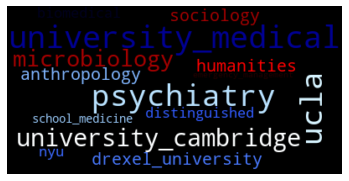

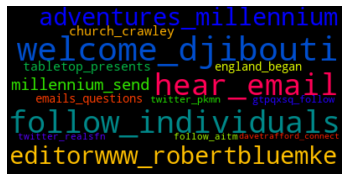

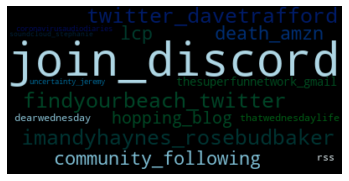

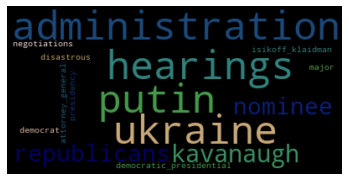

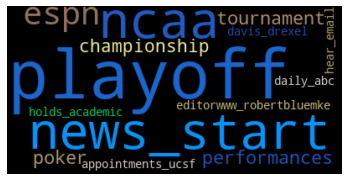

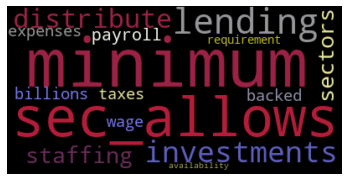

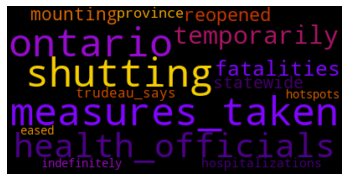

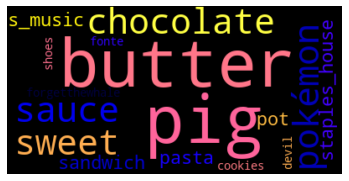

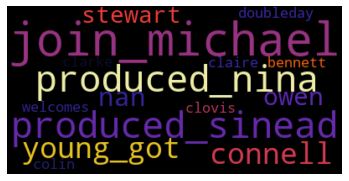

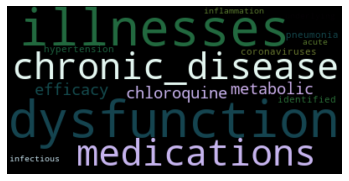

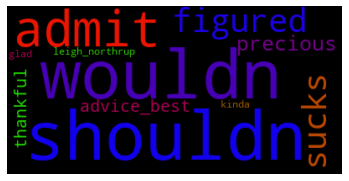

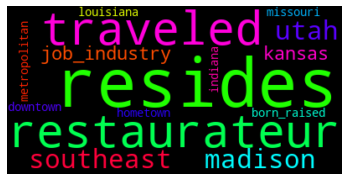

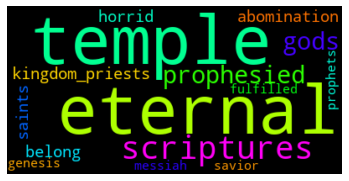

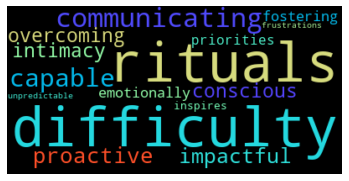

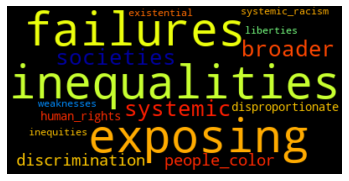

In [114]:
from itertools import cycle
from wordcloud import WordCloud, ImageColorGenerator;

cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(15):
    col = next(cmaps);
    display_cloud(i, col)
    plt.show()

In [115]:
top_words

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14
1,university_medical,welcome_djibouti,join_discord,administration’s,playoff,minimum,measures_taken,butter,join_michael,dysfunction,y’all,resides,temple,difficulty,inequalities
2,psychiatry,follow_individuals,imandyhaynes_rosebudbaker,hearings,news_start,sec_allows,ontario’s,pig,produced_sinead,illnesses,admit,restaurateur,eternal,rituals,exposing
3,ucla,hear_email,findyourbeach_twitter,putin,ncaa,lending,shutting,chocolate,produced_nina,chronic_disease,wouldn,traveled,scriptures,communicating,failures
4,university_cambridge,editorwww_robertbluemke,twitter_davetrafford,ukraine,playoffs,investments,health_officials,sauce,young_got,medications,figured,southeast,prophesied,capable,systemic
5,microbiology,adventures_millennium,community_following,kavanaugh,espn,distribute,temporarily,pokémon,connell,chloroquine,shouldn,utah,gods,proactive,societies
6,drexel_university,millennium_send,lcp,republicans,performances,staffing,fatalities,sweet’s_music,nan,metabolic,sucks,madison,kingdom_priests,impactful,broader
7,humanities,tabletop_presents,death_amzn,nominee,poker,sectors,reopened,pasta,owen,efficacy,precious,job_industry,saints,overcoming,discrimination
8,anthropology,church_crawley,hopping_blog,democratic_presidential,tournament,payroll,mounting,staples_house,stewart,hypertension,advice_best,kansas,horrid,intimacy,people_color
9,sociology,emails_questions,thesuperfunnetwork_gmail,isikoff_klaidman,championship,expenses,statewide,pot,doubleday,identified,thankful,born_raised,belong,conscious,disproportionate
10,distinguished,england_began,thatwednesdaylife,disastrous,editorwww_robertbluemke,taxes,province,sandwich,colin,pneumonia,leigh_northrup,downtown,abomination,fostering,human_rights


# LDA Topic Clusters

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [24]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Remove emails and newline characters

In [16]:
# Convert to list
data = df2_clean.notes_clean.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['consumer spending one important indicators economic health michael weber '
 'constantine yannelis share research insights effect pandemic federal '
 'stimulus policies spending trends tell economic recovery']


## Tokenize words and Clean-up text

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['consumer', 'spending', 'one', 'important', 'indicators', 'economic', 'health', 'michael', 'weber', 'constantine', 'yannelis', 'share', 'research', 'insights', 'effect', 'pandemic', 'federal', 'stimulus', 'policies', 'spending', 'trends', 'tell', 'economic', 'recovery']]


## Creating Bigram and Trigram Models

In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['consumer_spending', 'one', 'important', 'indicators', 'economic', 'health', 'michael', 'weber', 'constantine', 'yannelis', 'share', 'research', 'insights', 'effect', 'pandemic', 'federal', 'stimulus', 'policies', 'spending', 'trends', 'tell', 'economic_recovery']


## Remove Stopwords, Make Bigrams and Lemmatize

In [21]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in exclusions] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [23]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['consumer_spende', 'important', 'indicator', 'economic', 'health', 'share', 'research', 'insight', 'effect', 'pandemic', 'federal', 'stimulus', 'policy', 'spend', 'trend', 'tell', 'economic', 'recovery']]


## Create the Dictionary and Corpus needed for Topic Modeling

In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [26]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('consumer_spende', 1),
  ('economic', 2),
  ('effect', 1),
  ('federal', 1),
  ('health', 1),
  ('important', 1),
  ('indicator', 1),
  ('insight', 1),
  ('pandemic', 1),
  ('policy', 1),
  ('recovery', 1),
  ('research', 1),
  ('share', 1),
  ('spend', 1),
  ('stimulus', 1),
  ('tell', 1),
  ('trend', 1)]]

## Build LDA Model

In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## View Topics

In [28]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.230*"fear" + 0.134*"project" + 0.064*"slow" + 0.048*"suffer" + '
  '0.044*"confidence" + 0.033*"democracy" + 0.027*"press" + 0.027*"poor" + '
  '0.023*"living" + 0.017*"quarter"'),
 (1,
  '0.183*"use" + 0.069*"high" + 0.054*"spread" + 0.048*"medical" + '
  '0.044*"outbreak" + 0.043*"buy" + 0.034*"fight" + 0.033*"war" + '
  '0.027*"datum" + 0.025*"patient"'),
 (2,
  '0.115*"make" + 0.095*"support" + 0.070*"find" + 0.059*"think" + '
  '0.048*"free" + 0.041*"even" + 0.034*"happen" + 0.034*"great" + 0.033*"link" '
  '+ 0.030*"let"'),
 (3,
  '0.299*"call" + 0.091*"send" + 0.082*"article" + 0.077*"answer" + '
  '0.052*"app" + 0.038*"donate" + 0.035*"sound" + 0.035*"light" + '
  '0.033*"maintain" + 0.029*"publish"'),
 (4,
  '0.109*"experience" + 0.098*"community" + 0.058*"recent" + 0.054*"financial" '
  '+ 0.052*"lose" + 0.038*"rise" + 0.037*"value" + 0.036*"student" + '
  '0.034*"stress" + 0.033*"do"'),
 (5,
  '0.061*"time" + 0.051*"talk" + 0.037*"show" + 0.037*"week" + 0.033*"take

### Topics Inference

## Compute Model Perplexity and Coherence Score

In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.16382694093477

Coherence Score:  0.2820263777390806


## Visualization

In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.305794 -0.186409       1        1  27.615395
5      0.294815 -0.198042       2        1  21.529766
2      0.148382  0.316678       3        1   7.975372
19     0.140113  0.200570       4        1   7.505436
8      0.043816  0.053607       5        1   4.315657
14     0.059500  0.073614       6        1   3.962627
10     0.001440  0.015235       7        1   3.083234
18    -0.012343  0.005309       8        1   2.779578
4     -0.016521  0.002700       9        1   2.763642
13    -0.031690 -0.006101      10        1   2.691659
9     -0.015999  0.003207      11        1   2.611945
1     -0.031298 -0.005917      12        1   2.457525
17    -0.058477 -0.019180      13        1   2.311568
3     -0.075492 -0.025781      14        1   1.618859
11    -0.082125 -0.028259      15        1   1.538786
15    -0.096487 -0.032853      16        1   1.523453
16    -0.115037 -0.037988      17        1   1.381510
7     -0.108466 -0.036295      18        1   1.298904
0     -0.175121 -0.047055      19        1   0.520963
6     -0.174804 -0.047041      20        1   0.514113, topic_info=          Term          Freq         Total Category  logprob  loglift
22     discuss   5531.000000   5531.000000  Default  30.0000  30.0000
8     pandemic  14042.000000  14042.000000  Default  29.0000  29.0000
121       make   6581.000000   6581.000000  Default  28.0000  28.0000
185       time   9432.000000   9432.000000  Default  27.0000  27.0000
658       call   3461.000000   3461.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
3677   sponsor      0.040975      1.047222  Topic20 -11.4053   2.0296
1853    medium      0.040975      1.047219  Topic20 -11.4053   2.0296
3235    always      0.040975      1.047185  Topic20 -11.4053   2.0296
2391   anxiety      0.040975      1.047181  Topic20 -11.4053   2.0296
1333    member      0.040975      1.047226  Topic20 -11.4053   2.0295

[766 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
153       8  0.998246            able
33        6  0.999018          access
1087     14  0.924452  accomplishment
466       9  0.993280          accord
204       8  0.999125          action
...     ...       ...             ...
300       1  0.999921            will
110       1  0.999715            work
111       4  0.999228          worker
188       1  0.016082           world
188       4  0.983789           world

[533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 6, 3, 20, 9, 15, 11, 19, 5, 14, 10, 2, 18, 4, 12, 16, 17, 8, 1, 7])

## Find optimal number of topics

In [59]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [60]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

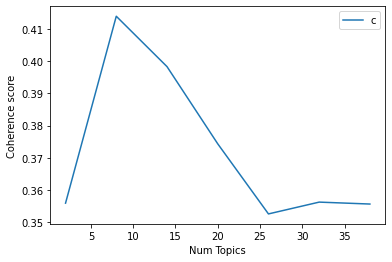

In [61]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [62]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3559
Num Topics = 8  has Coherence Value of 0.4139
Num Topics = 14  has Coherence Value of 0.3983
Num Topics = 20  has Coherence Value of 0.3743
Num Topics = 26  has Coherence Value of 0.3526
Num Topics = 32  has Coherence Value of 0.3562
Num Topics = 38  has Coherence Value of 0.3557


## Retraining and visualization

In [63]:
# Build LDA model
lda_model_2 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)

In [64]:
# Print the Keyword in the 10 topics
pprint(lda_model_2.print_topics())
doc_lda_2 = lda_model_2[corpus]

[(0,
  '0.041*"week" + 0.030*"discuss" + 0.026*"will" + 0.026*"show" + 0.026*"talk" '
  '+ 0.020*"late" + 0.020*"call" + 0.019*"new" + 0.017*"news" + 0.016*"back"'),
 (1,
  '0.020*"pandemic" + 0.015*"health" + 0.014*"covid" + 0.011*"virus" + '
  '0.011*"people" + 0.011*"may" + 0.008*"will" + 0.007*"coronavirus" + '
  '0.007*"case" + 0.007*"public"'),
 (2,
  '0.026*"work" + 0.017*"share" + 0.014*"time" + 0.013*"experience" + '
  '0.013*"pandemic" + 0.011*"learn" + 0.010*"help" + 0.010*"food" + '
  '0.009*"family" + 0.009*"life"'),
 (3,
  '0.039*"support" + 0.023*"message" + 0.022*"make" + 0.020*"music" + '
  '0.019*"patreon" + 0.016*"anchor" + 0.015*"show" + 0.014*"live" + '
  '0.013*"twitter" + 0.012*"follow"'),
 (4,
  '0.032*"business" + 0.019*"will" + 0.017*"pandemic" + '
  '0.012*"privacy_privacy" + 0.012*"market" + 0.012*"money" + '
  '0.012*"opt_information" + 0.012*"state" + 0.012*"company" + '
  '0.011*"industry"'),
 (5,
  '0.018*"time" + 0.015*"go" + 0.015*"thing" + 0.015*"know

    Topic 0 : All/Generic
    Topic 1 : Pandemic cases 
    Topic 2 : Social impact (work, family life)
    Topic 3 : Encouragement and support
    Topic 4 : Financial impact (business and industry)
    Topic 5 : Quarantine relationship (let go, life, love)
    Topic 6 : Community (woman, history, black, church)
    Topic 7 : Entertainment (sport, game)

In [65]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -26.076008397710087

Coherence Score:  0.4135340914930228


In [66]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_2, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.145468  0.070001       1        1  24.659351
1      0.038496 -0.192652       2        1  19.667288
2      0.031592  0.015864       3        1  14.061348
3     -0.066236  0.127022       4        1  12.637736
4      0.053409 -0.279878       5        1   8.657579
7     -0.119812  0.122703       6        1   7.771638
0     -0.139129 -0.015676       7        1   7.583304
6      0.347149  0.152614       8        1   4.961759, topic_info=         Term         Freq        Total Category  logprob  loglift
385   support  4151.000000  4151.000000  Default  30.0000  30.0000
346      week  4310.000000  4310.000000  Default  29.0000  29.0000
67   business  2000.000000  2000.000000  Default  28.0000  28.0000
300      will  6263.000000  6263.000000  Default  27.0000  27.0000
905      show  4147.000000  4147.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
732   special   230.542099   952.997070   Topic8  -5.0372   1.5842
185      time   278.478546  6574.079590   Topic8  -4.8483  -0.1581
164      life   253.476700  3051.452148   Topic8  -4.9423   0.5153
253    change   245.691467  2287.368896   Topic8  -4.9735   0.7723
230    people   244.184677  4588.997559   Topic8  -4.9797   0.0699

[558 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
466       2  0.999723     accord
3786      5  0.997702   activist
2237      4  1.001713      actor
4200      3  1.001347     actual
1352      3  0.995441     advise
...     ...       ...        ...
1445      7  0.115499       year
575       7  0.937869  yesterday
575       8  0.065944  yesterday
1800      6  0.186252    youtube
1800      8  0.812911    youtube

[1092 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 3, 4, 5, 8, 1, 7])

## Find dominant topics for each podcasts

In [189]:
def dominant_topic(ldamodel, corpus, texts):
    #Function to find the dominant topic in each review
    sent_topics_df = pd.DataFrame() 
    # Get main topic in each review
    for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
        row = sorted(ldamodel.get_document_topics(corpus[i]), key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each review
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # =&gt; dominant topic
                wp = ldamodel.show_topic(topic_num,topn=4)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = dominant_topic(ldamodel=lda_model_2, corpus=corpus, texts=data)
df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,1.0,0.7102,"pandemic, health, covid, virus",consumer spending one important indicators eco...
1,1.0,0.5457,"pandemic, health, covid, virus",central banks playing critical yet little disc...
2,1.0,0.7672,"pandemic, health, covid, virus",cares act two thirds eligible unemployed ameri...
3,1.0,0.8605,"pandemic, health, covid, virus",south korea detected first case covid one day ...
4,1.0,0.5633,"pandemic, health, covid, virus",visiting bookstore put greater risk infection ...
...,...,...,...,...
23460,3.0,0.9885,"support, message, make, music",preview upcoming patreon exclusive peter jacob...
23461,3.0,0.7544,"support, message, make, music",made partners keith bradley thomas mcintyre ty...
23462,1.0,0.5178,"pandemic, health, covid, virus",coronavirus spreads respiratory droplets relea...
23463,0.0,0.1250,"week, discuss, will, show",nan


In [205]:
df_topic_sents_keywords_clean = df_topic_sents_keywords.drop_duplicates().reset_index(drop = True)
df_topic_sents_keywords_clean.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
df_topic_sents_keywords_clean

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1.0,0.7102,"pandemic, health, covid, virus",consumer spending one important indicators eco...
1,1.0,0.5457,"pandemic, health, covid, virus",central banks playing critical yet little disc...
2,1.0,0.7672,"pandemic, health, covid, virus",cares act two thirds eligible unemployed ameri...
3,1.0,0.8605,"pandemic, health, covid, virus",south korea detected first case covid one day ...
4,1.0,0.5633,"pandemic, health, covid, virus",visiting bookstore put greater risk infection ...
...,...,...,...,...
20617,2.0,0.7049,"work, share, time, experience",today christoph shares five tips fundraising p...
20618,3.0,0.9885,"support, message, make, music",preview upcoming patreon exclusive peter jacob...
20619,3.0,0.7544,"support, message, make, music",made partners keith bradley thomas mcintyre ty...
20620,1.0,0.5178,"pandemic, health, covid, virus",coronavirus spreads respiratory droplets relea...


In [191]:
# Format
df_dominant_topic = df_topic_sents_keywords.drop_duplicates().reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7102,"pandemic, health, covid, virus",consumer spending one important indicators eco...
1,1,1.0,0.5457,"pandemic, health, covid, virus",central banks playing critical yet little disc...
2,2,1.0,0.7672,"pandemic, health, covid, virus",cares act two thirds eligible unemployed ameri...
3,3,1.0,0.8605,"pandemic, health, covid, virus",south korea detected first case covid one day ...
4,4,1.0,0.5633,"pandemic, health, covid, virus",visiting bookstore put greater risk infection ...
...,...,...,...,...,...
20617,23459,2.0,0.7049,"work, share, time, experience",today christoph shares five tips fundraising p...
20618,23460,3.0,0.9885,"support, message, make, music",preview upcoming patreon exclusive peter jacob...
20619,23461,3.0,0.7544,"support, message, make, music",made partners keith bradley thomas mcintyre ty...
20620,23462,1.0,0.5178,"pandemic, health, covid, virus",coronavirus spreads respiratory droplets relea...


In [192]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7102,"pandemic, health, covid, virus",consumer spending one important indicators eco...
1,1,1.0,0.5457,"pandemic, health, covid, virus",central banks playing critical yet little disc...
2,2,1.0,0.7672,"pandemic, health, covid, virus",cares act two thirds eligible unemployed ameri...
3,3,1.0,0.8605,"pandemic, health, covid, virus",south korea detected first case covid one day ...
4,4,1.0,0.5633,"pandemic, health, covid, virus",visiting bookstore put greater risk infection ...
5,5,2.0,0.5473,"work, share, time, experience",march american workers lost jobs begin think u...
6,6,7.0,0.7687,"time, story, year, win",freakonomics’ steve levitt believes power ince...
7,7,2.0,0.5033,"work, share, time, experience",room optimism amid economic shock magnitude au...
8,8,1.0,0.6390,"pandemic, health, covid, virus",many workers able continue working without lea...
9,9,5.0,0.5104,"time, go, thing, know",life priceless it’s cheap michael greenstone d...


## Find dominant texts for each topics

In [208]:
# Group top 5 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf 

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9961,"week, discuss, will, show",novel coronavirus impacts lives around world a...
1,1.0,0.9984,"pandemic, health, covid, virus",past day number confirmed covid cases approach...
2,2.0,0.9956,"work, share, time, experience",icu intimidating stressful environment everyon...
3,3.0,0.9961,"support, message, make, music",join live every day chat conversation comedy m...
4,4.0,0.9946,"business, will, pandemic, privacy_privacy",strategy plan place lose weight attack fat fai...
5,5.0,0.9976,"time, go, thing, know",one got away date update leo calls keola show ...
6,6.0,0.9965,"woman, history, black, book",global crises cause big changes reveal deep st...
7,7.0,0.9961,"time, story, year, win",guys discuss legalized prostitution dub top ma...


In [162]:
print(sent_topics_sorteddf["Text"][0])

novel coronavirus impacts lives around world abc news separating noise bringing covid need know host aaron katersky provides news day correspondents fanned around world chief medical correspondent jennifer ashton answers questions covid need know production abc audio makers daily abc news start chart topping series dropout abcaudio podcasts


In [163]:
print(sent_topics_sorteddf["Text"][1])

past day number confirmed covid cases approaching times number recovered cases first time china reports new cases domestically experts warn second wave infections possible younger adults account close percent hospitalizations coronavirus surgeon general states days social distancing may adequate halt virus spread navy hospital ships deployed new york west coast preparation rising number covid cases fda officials assure citizens food shortages exist countries closing borders measure combat coronavirus spread


In [164]:
print(sent_topics_sorteddf["Text"][2])

icu intimidating stressful environment everyone involved especially kids talk tips use help mediate ‘scariness’ icu help keep experience positive possible


In [165]:
print(sent_topics_sorteddf["Text"][3])

join live every day chat conversation comedy music hosts robin ince josie long welcome huge range big name guests couches homes today’s guests phill jupitus akinta saxena stay home festival free watch please consider dropping tip bucket cosmicshambles stayathome profits will supporting acts artists venues lost income pandemic you’d directly support cosmic shambles network visit patreon cosmicshambles


In [166]:
print(sent_topics_sorteddf["Text"][4])

strategy plan place lose weight attack fat fail plan plan fail plan attack attack plan don sidetracked zach vogler heaviest lost almost lbs zachattacksfat


In [167]:
print(sent_topics_sorteddf["Text"][5])

one got away date update leo calls keola show girl named ella went dates leo says thought things going really well last night never called back leo says shared uber home partway ride said wasn feeling well added stop got house leaving leo home alone call ella find happened originally aired bomb june


In [168]:
print(sent_topics_sorteddf["Text"][6])

global crises cause big changes reveal deep structural weaknesses drastic measures taken across world stop spread covid short medium long term implications society economy geopolitics individuals special interview series rsa it’s chief executive matthew taylor talks range practitioners scholars business leaders politicians journalists assess scale response consider build effective bridges new future daisy fancourt associate professor psychobiology epidemiology university college london wish take part ucl study mental health impact coronavirus click produced craig templeton smithin time global change strong communities initiatives bring people together invaluable rsa fellowship global network problem solvers invite join community today stay connected inspired motivated months ahead learn fellowship start application clicking


In [169]:
print(sent_topics_sorteddf["Text"][7])

guys discuss legalized prostitution dub top makes debut top bangers gunther dubs recall ridiculous story guys making road golf trip joins


## Topic Distribution Across Documents

In [213]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().reset_index(drop=True)

# Sample Text
topic_text = sent_topics_sorteddf[['Text', 'Topic_Num']]
topic_text.columns = ['Text','Dominant_Topic']

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics_merged = pd.merge(df_dominant_topics, topic_text, on='Dominant_Topic').sort_values(by='Num_Documents', ascending=False)
df_dominant_topics_merged

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents,Text
5,0.0,"week, discuss, will, show",5890,0.2510,novel coronavirus impacts lives around world a...
1,2.0,"work, share, time, experience",4179,0.1781,icu intimidating stressful environment everyon...
0,1.0,"pandemic, health, covid, virus",4001,0.1705,past day number confirmed covid cases approach...
3,5.0,"time, go, thing, know",3093,0.1318,one got away date update leo calls keola show ...
2,7.0,"time, story, year, win",2792,0.1190,guys discuss legalized prostitution dub top ma...
4,4.0,"business, will, pandemic, privacy_privacy",1487,0.0634,strategy plan place lose weight attack fat fai...
7,6.0,"woman, history, black, book",1285,0.0548,global crises cause big changes reveal deep st...
6,3.0,"support, message, make, music",738,0.0315,join live every day chat conversation comedy m...
